In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Charger le fichier CSV depuis votre ordinateur
uploaded = files.upload()

Saving Task 3 and 4_Loan_Data (1).csv to Task 3 and 4_Loan_Data (1) (1).csv


   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 

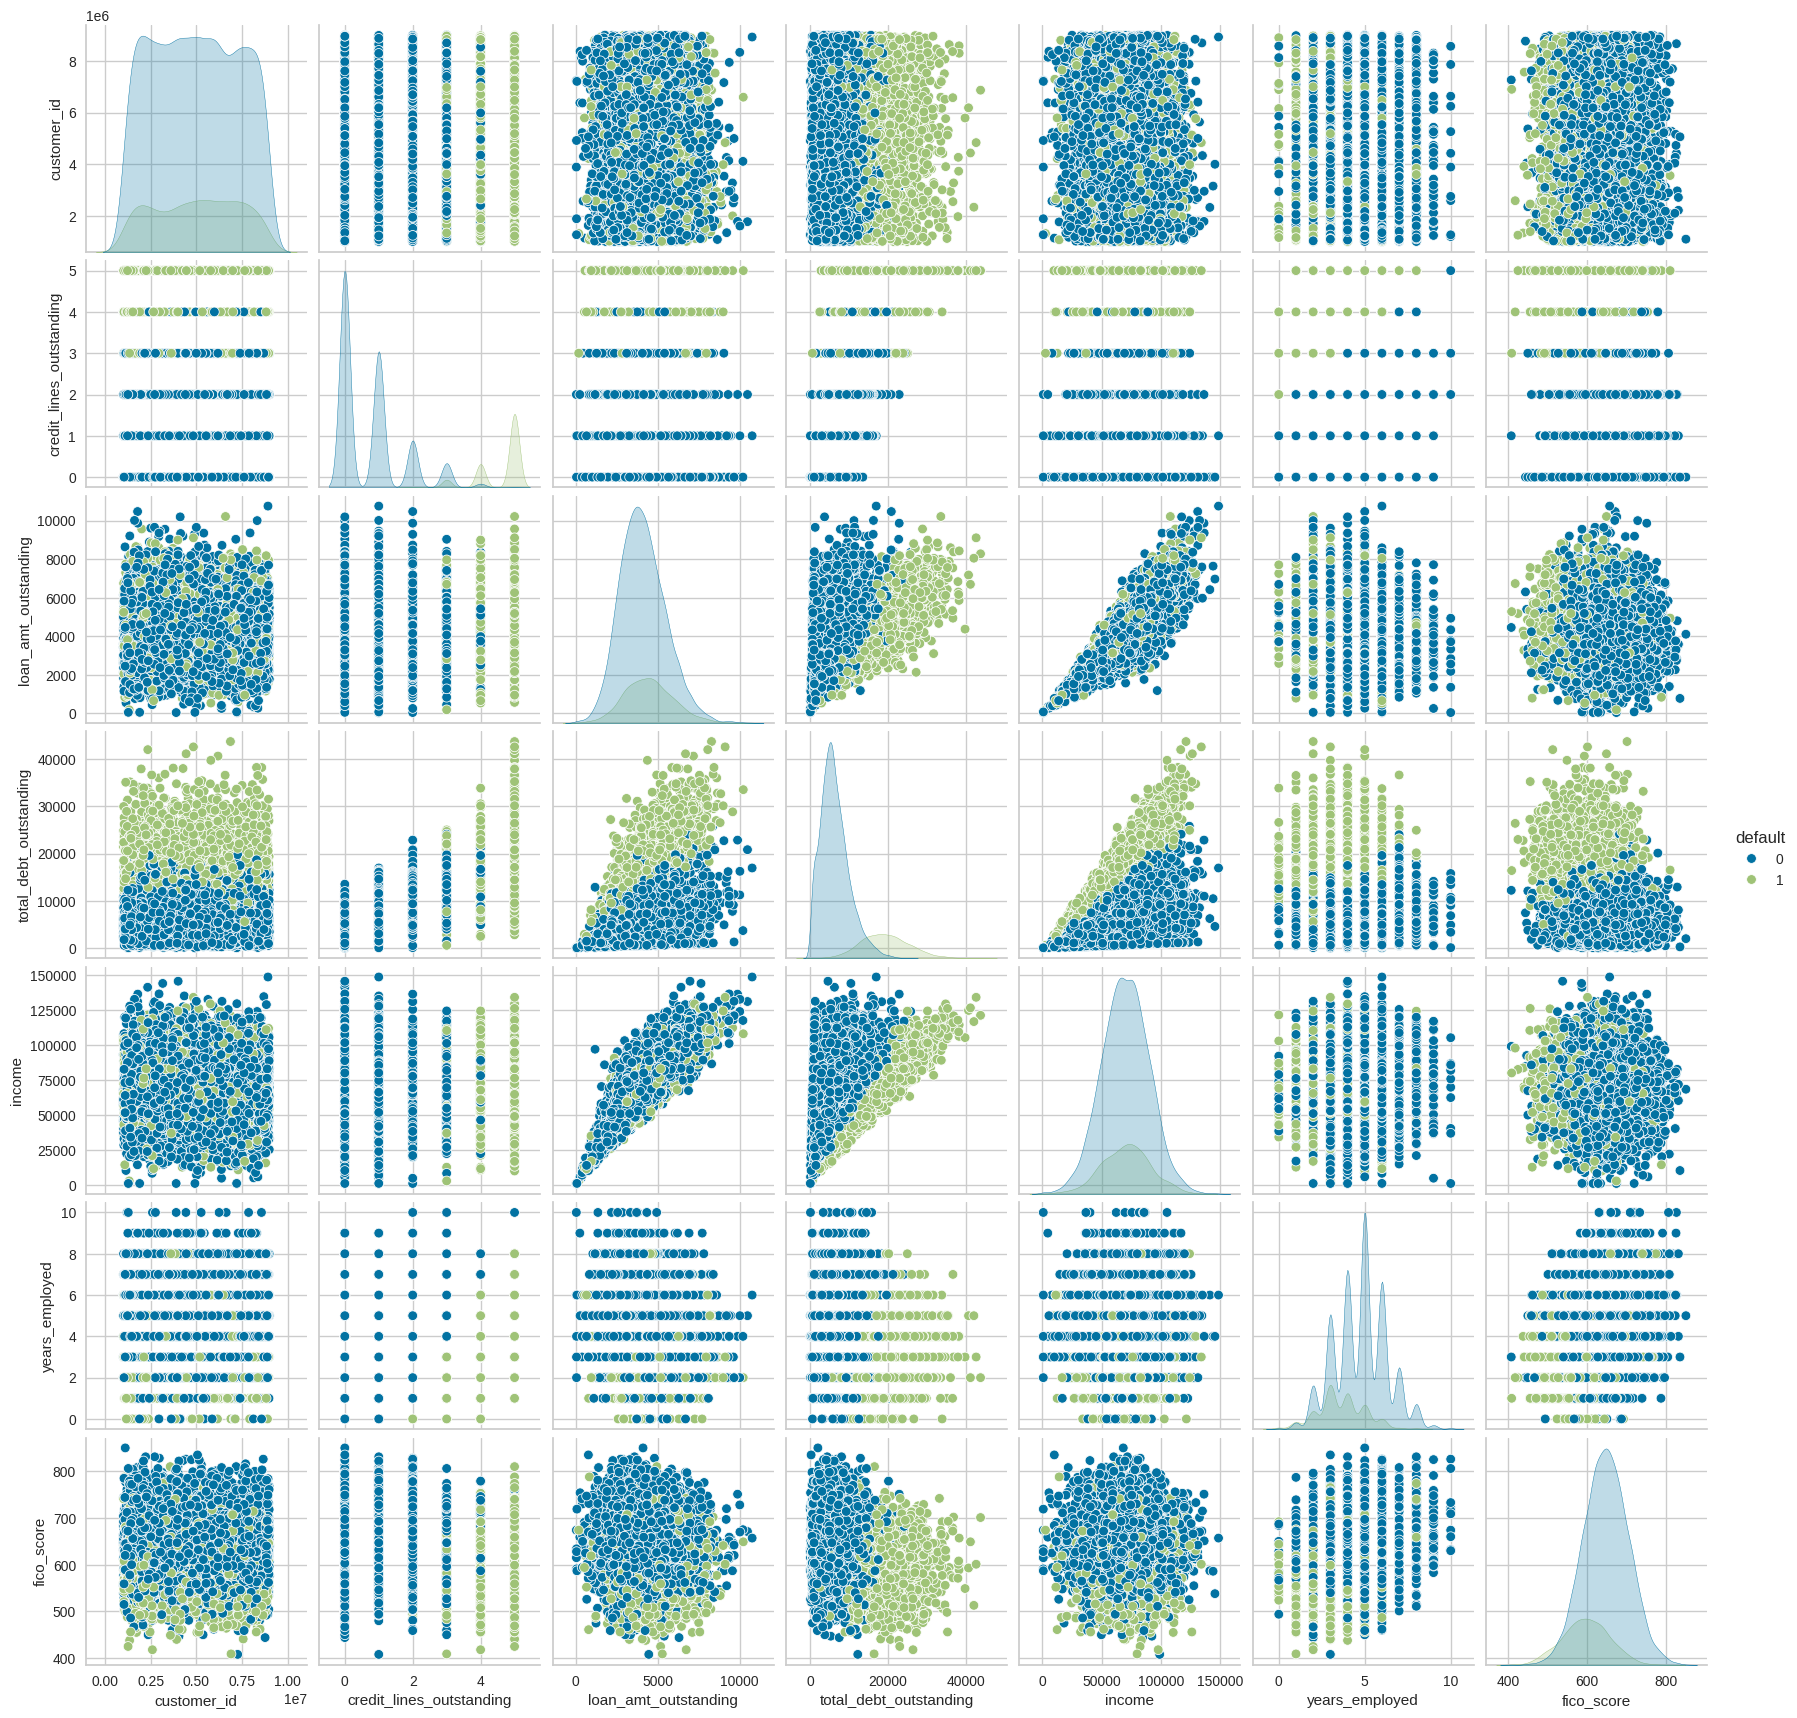

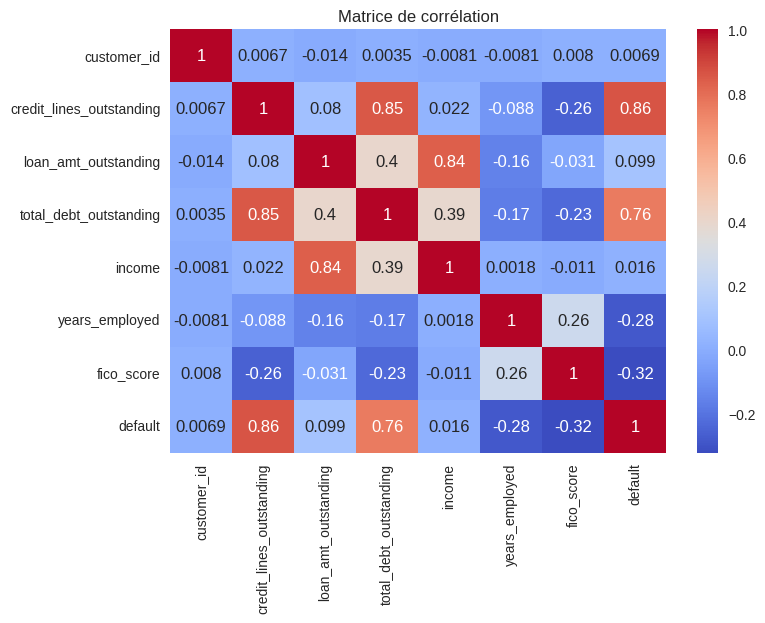

In [ ]:
import numpy as np
import seaborn as sns

# Charger les données
data = pd.read_csv("Task 3 and 4_Loan_Data (1).csv")

# Afficher les premières lignes du dataframe
print(data.head())

# Informations sur les données
print(data.info())

# Statistiques descriptives
print(data.describe())

# Vérifier les valeurs manquantes
print(data.isnull().sum())

# Visualisation des distributions et des relations entre les variables
sns.pairplot(data, hue='default', diag_kind='kde')
plt.show()

# Matrice de corrélation
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Convertir les scores FICO en catégories
def fico_to_category(score):
    if score < 580:
        return 'Poor'
    elif score < 670:
        return 'Fair'
    elif score < 740:
        return 'Good'
    elif score < 800:
        return 'Very Good'
    else:
        return 'Exceptional'

data['fico_category'] = data['fico_score'].apply(fico_to_category)

# Diviser les données en ensembles d'entraînement et de test
X = data.drop(['customer_id', 'fico_score', 'default'], axis=1)
y = data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.98      0.98      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



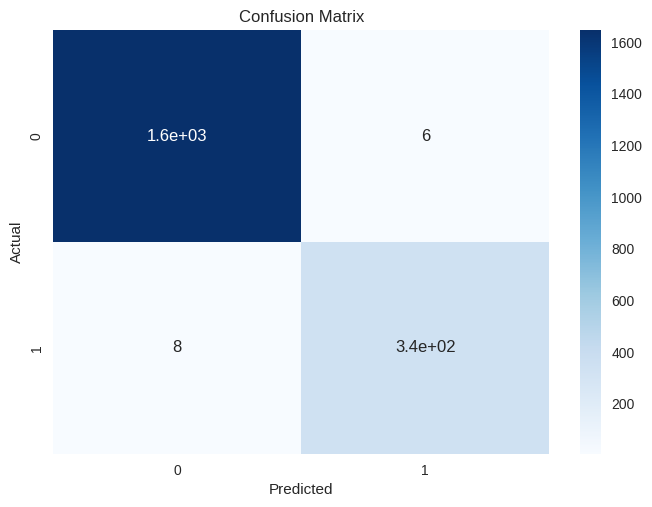

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Charger les données
data = pd.read_csv("Task 3 and 4_Loan_Data (1).csv")

# Convertir les scores FICO en catégories
def fico_to_category(score):
    if score < 580:
        return 'Poor'
    elif score < 670:
        return 'Fair'
    elif score < 740:
        return 'Good'
    elif score < 800:
        return 'Very Good'
    else:
        return 'Exceptional'

data['fico_category'] = data['fico_score'].apply(fico_to_category)

# Diviser les données en ensembles d'entraînement et de test
X = data.drop(['customer_id', 'fico_score', 'default'], axis=1)
y = data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir les variables catégorielles en variables indicatrices
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Aligner les colonnes pour les ensembles d'entraînement et de test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test_encoded)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test_encoded)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.993


In [ ]:
from sklearn.metrics import mean_squared_error

# Entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test_encoded)

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.007
